#📌 Extracão

In [7]:
import pandas as pd
import requests

# URL do ficheiro JSON bruto no GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Fazer a requisição
response = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    dados = response.json()
    df = pd.DataFrame(dados)
    print(df.head())
else:
    print(f"Erro na requisição: {response.status_code}")



   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformação

In [ ]:
# Ver as colunas e os tipos de dados
print(df.info())

# Verificar as primeiras linhas dos dados
print(df.head())

# Verificar estatísticas descritivas para variáveis numéricas
print(df.describe())


Colunas mais relevantes para a análise de evasão:
🔍 Pela experiência e análise inicial, estas colunas são cruciais:

Contract – Clientes com contratos mensais tendem a cancelar mais.

Tenure – Tempo como cliente, clientes recentes têm maior probabilidade de cancelar.

PaymentMethod – Certos métodos de pagamento podem estar associados a maior evasão.

MonthlyCharges e TotalCharges – Despesas podem influenciar na decisão.

InternetService, OnlineSecurity, TechSupport – Serviços que podem impactar na satisfação.

Churn – É a variável alvo (target) para prever se o cliente irá cancelar ou não.



In [15]:
import pandas as pd

# 📥 Carregar os dados
df = pd.read_json('TelecomX_Data.json')

# 🏗️ Expandir colunas aninhadas (primeiro nível)
df_expanded = df.copy()

for col in ['customer', 'phone', 'internet', 'account']:
    expanded = df_expanded[col].apply(pd.Series)
    df_expanded = pd.concat([df_expanded.drop(columns=col), expanded], axis=1)

# 🔍 Verificar se ainda restam dicionários
for col in df_expanded.columns:
    if df_expanded[col].apply(lambda x: isinstance(x, (dict, list))).any():
        print(f"⚠️ A coluna '{col}' ainda contém dicionários ou listas.")

# 🏗️ Segunda expansão, se necessário
cols_with_dict = [col for col in df_expanded.columns if df_expanded[col].apply(lambda x: isinstance(x, dict)).any()]

for col in cols_with_dict:
    expanded = df_expanded[col].apply(pd.Series)
    df_expanded = pd.concat([df_expanded.drop(columns=col), expanded], axis=1)

# 🔁 Verificar e remover duplicatas
duplicates = df_expanded.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicates}")

df_final = df_expanded.drop_duplicates()

# 🧽 Verificar valores ausentes após expansão
print("\nValores ausentes após expansão:")
print(df_final.isnull().sum())

# 👀 Visualizar as primeiras linhas
print("\nAmostra dos dados expandidos:")
print(df_final.head())

# 🗺️ Verificar o formato final das colunas
print("\nColunas finais do DataFrame:")
print(df_final.columns.tolist())


        


⚠️ A coluna 'Charges' ainda contém dicionários ou listas.

Número de linhas duplicadas: 0

Valores ausentes após expansão:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

Amostra dos dados expandidos:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  001

In [16]:
import pandas as pd

# 📥 Carregar e expandir os dados (etapas anteriores)
df = pd.read_json('TelecomX_Data.json')

for col in ['customer', 'phone', 'internet', 'account']:
    expanded = df[col].apply(pd.Series)
    df = pd.concat([df.drop(columns=col), expanded], axis=1)

# Verificar se ainda existem dicionários e expandir novamente se necessário
cols_with_dict = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]
for col in cols_with_dict:
    expanded = df[col].apply(pd.Series)
    df = pd.concat([df.drop(columns=col), expanded], axis=1)

# 🧽 Verificar valores ausentes
print("\nValores ausentes:")
print(df.isnull().sum())

# 🔧 Tratar valores ausentes
# Exemplo: Se houver valores ausentes em TotalCharges, preencher com 0 ou média
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Se existir SeniorCitizen como NaN, preencher com 0 (suposição)
if 'SeniorCitizen' in df.columns:
    df['SeniorCitizen'].fillna(0, inplace=True)

# Para colunas categóricas, preencher NaN com 'Não informado'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Não informado')

# 🔠 Padronizar categorias: tirar espaços extras, colocar tudo minúsculo
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

# 🔢 Verificar tipos de dados
print("\nTipos de dados após ajustes:")
print(df.dtypes)

# 🔁 Remover duplicatas
duplicates = df.duplicated().sum()
print(f"\nNúmero de duplicatas encontradas: {duplicates}")
df = df.drop_duplicates()

# 👀 Conferir os dados após limpeza
print("\nAmostra dos dados tratados:")
print(df.head())

# 🚦 Conferir novamente valores ausentes
print("\nValores ausentes após tratamento:")
print(df.isnull().sum())



Valores ausentes:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

Tipos de dados após ajustes:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object


C:\Users\laris\AppData\Local\Temp\ipykernel_1476\532497217.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SeniorCitizen'].fillna(0, inplace=True)


In [19]:
# 🔧 Garantir que a coluna Monthly seja numérica
df['Monthly'] = pd.to_numeric(df['Monthly'], errors='coerce')

# 🧮 Criar a coluna Contas_Diarias
df['Contas_Diarias'] = df['Monthly'] / 30

# 👀 Visualizar as primeiras linhas
print(df[['Monthly', 'Contas_Diarias']].head())



   Monthly  Contas_Diarias
0     65.6        2.186667
1     59.9        1.996667
2     73.9        2.463333
3     98.0        3.266667
4     83.9        2.796667


In [20]:
# 📜 Dicionário para mapear respostas sim/não
map_binario = {'yes': 1, 'no': 0, 'sim': 1, 'não': 0, 'nao': 0}

# 🧠 Colunas com respostas binárias
colunas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# 🔁 Aplicar o mapeamento binário
for coluna in colunas_binarias:
    df[coluna] = df[coluna].str.strip().str.lower().map(map_binario)

# ✅ Renomear colunas para deixar mais claro
df.rename(columns={
    'Churn': 'Cancelou',
    'Monthly': 'Fatura_Mensal',
    'Total': 'Fatura_Total',
    'Partner': 'Possui_Parceiro',
    'Dependents': 'Possui_Dependentes',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Papel',
    'PaymentMethod': 'Metodo_Pagamento'
}, inplace=True)

# 🧼 Conferir o resultado
print(df.head())


   customerID  Cancelou  gender  SeniorCitizen  Possui_Parceiro  \
0  0002-orfbo       0.0  female              0                1   
1  0003-mknfe       0.0    male              0                0   
2  0004-tlhlj       1.0    male              0                0   
3  0011-igkff       1.0    male              1                1   
4  0013-exchz       1.0  female              1                1   

   Possui_Dependentes  tenure  Servico_Telefone  Multiplas_Linhas  \
0                   1       9                 1               0.0   
1                   0       9                 1               1.0   
2                   0       4                 1               0.0   
3                   0      13                 1               0.0   
4                   0       3                 1               0.0   

  Tipo_Internet  ...  Protecao_Dispositivo  Suporte_Tecnico  Streaming_TV  \
0           dsl  ...                   0.0              1.0           1.0   
1           dsl  ...        

#📊 Carga e análise

In [5]:
import pandas as pd

# 📥 Carregando os dados
df = pd.read_json("TelecomX_Data.json")

# 🧬 Expandindo os dicionários em colunas (se necessário)
df = pd.concat([
    df[['customerID', 'Churn']],  # Mantém colunas principais
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)


# 🔍 Ver colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("📌 Colunas numéricas:", list(colunas_numericas))

# 📈 Estatísticas descritivas das colunas numéricas
print("\n📊 Estatísticas descritivas:")
print(df[colunas_numericas].describe().transpose())

# 🧮 Mediana separadamente (pandas não mostra por padrão)
print("\n🔹 Medianas:")
print(df[colunas_numericas].median())

# 📌 Frequência de cancelamentos (Churn / Cancelou)
if 'Cancelou' in df.columns:
    print("\n🔄 Distribuição de Cancelamentos:")
    print(df['Cancelou'].value_counts(normalize=True) * 100)

# 📌 Frequência por tipo de contrato
if 'Tipo_Contrato' in df.columns:
    print("\n📄 Tipos de Contrato:")
    print(df['Tipo_Contrato'].value_counts(normalize=True) * 100)

# 📌 Frequência por método de pagamento
if 'Metodo_Pagamento' in df.columns:
    print("\n💳 Métodos de Pagamento:")
    print(df['Metodo_Pagamento'].value_counts(normalize=True) * 100)


📌 Colunas numéricas: ['SeniorCitizen', 'tenure']

📊 Estatísticas descritivas:
                count       mean        std  min  25%   50%   75%   max
SeniorCitizen  7267.0   0.162653   0.369074  0.0  0.0   0.0   0.0   1.0
tenure         7267.0  32.346498  24.571773  0.0  9.0  29.0  55.0  72.0

🔹 Medianas:
SeniorCitizen     0.0
tenure           29.0
dtype: float64


C:\Users\laris\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


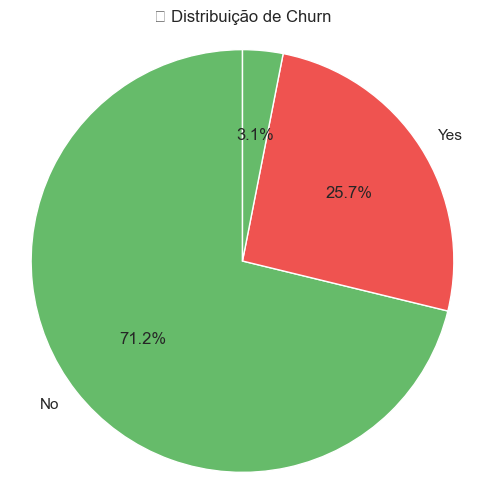

C:\Users\laris\AppData\Local\Temp\ipykernel_11292\3028316489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['#66bb6a', '#ef5350'])
C:\Users\laris\AppData\Local\Temp\ipykernel_11292\3028316489.py:22: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Churn', data=df, palette=['#66bb6a', '#ef5350'])
C:\Users\laris\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


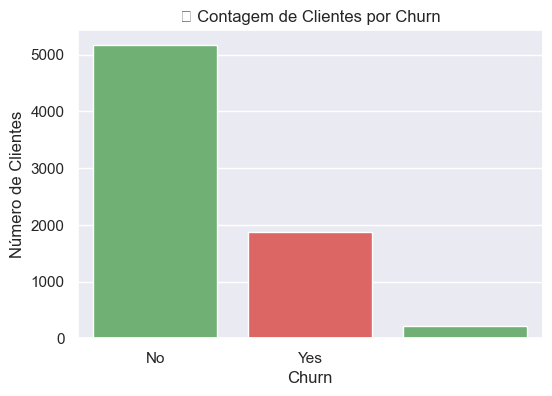

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usa o estilo padrão do seaborn
sns.set()

# Verifica se a coluna 'Churn' existe
if 'Churn' in df.columns:
    # 📊 Gráfico de pizza
    churn_counts = df['Churn'].value_counts()
    labels = churn_counts.index
    sizes = churn_counts.values

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66bb6a', '#ef5350'])
    plt.title('📉 Distribuição de Churn')
    plt.axis('equal')
    plt.show()

    # 📊 Gráfico de barras
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Churn', data=df, palette=['#66bb6a', '#ef5350'])
    plt.title('📊 Contagem de Clientes por Churn')
    plt.xlabel('Churn')
    plt.ylabel('Número de Clientes')
    plt.show()
else:
    print("❌ A coluna 'Churn' não foi encontrada no DataFrame.")




In [8]:
# Lista de variáveis categóricas para análise
variaveis_categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService',
                         'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV']

# Para cada variável, calcula a taxa de churn
for var in variaveis_categoricas:
    if var in df.columns:
        print(f"\n🔎 Taxa de churn por '{var}':")
        taxa = df.groupby(var)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
        taxa = taxa.rename(columns={'Yes': 'Churn (%)', 'No': 'Retenção (%)'})
        display(taxa.round(2))
    else:
        print(f"⚠️ A coluna '{var}' não foi encontrada no DataFrame.")



🔎 Taxa de churn por 'gender':


Churn,,Retenção (%),Churn (%)
gender,,,
Female,2.90,70.96,26.14
Male,3.27,71.43,25.31



🔎 Taxa de churn por 'Contract':


Churn,,Retenção (%),Churn (%)
Contract,,,
Month-to-month,3.25,55.43,41.32
One year,3.03,86.04,10.93
Two year,2.75,94.49,2.75



🔎 Taxa de churn por 'PaymentMethod':


Churn,,Retenção (%),Churn (%)
PaymentMethod,,,
Bank transfer (automatic),2.83,80.93,16.24
Credit card (automatic),2.93,82.27,14.80
Electronic check,3.27,52.92,43.80
Mailed check,3.18,78.32,18.50



🔎 Taxa de churn por 'InternetService':


Churn,,Retenção (%),Churn (%)
InternetService,,,
DSL,2.69,78.86,18.45
Fiber optic,3.19,56.25,40.56
No,3.48,89.37,7.15



🔎 Taxa de churn por 'OnlineSecurity':


Churn,,Retenção (%),Churn (%)
OnlineSecurity,,,
No,3.05,56.46,40.49
No internet service,3.48,89.37,7.15
Yes,2.84,82.96,14.20



🔎 Taxa de churn por 'OnlineBackup':


Churn,,Retenção (%),Churn (%)
OnlineBackup,,,
No,2.95,58.30,38.75
No internet service,3.48,89.37,7.15
Yes,3.00,76.12,20.89



🔎 Taxa de churn por 'TechSupport':


Churn,,Retenção (%),Churn (%)
TechSupport,,,
No,3.04,56.59,40.37
No internet service,3.48,89.37,7.15
Yes,2.85,82.41,14.73



🔎 Taxa de churn por 'StreamingTV':


Churn,,Retenção (%),Churn (%)
StreamingTV,,,
No,2.97,64.50,32.53
No internet service,3.48,89.37,7.15
Yes,2.97,67.85,29.18


⚠️ Coluna 'Total' não encontrada.


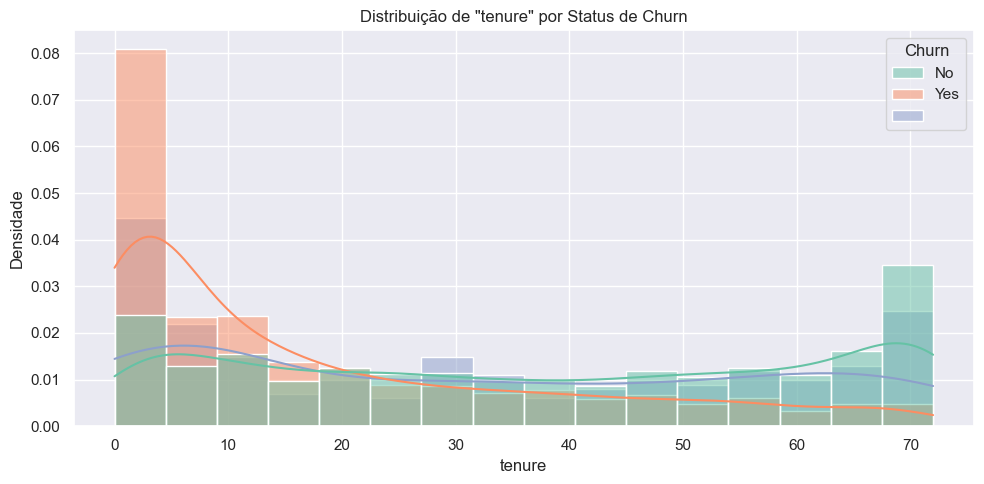

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis numéricas para comparar
variaveis_numericas = ['Total', 'tenure']
if 'Contas_Diarias' in df.columns:
    variaveis_numericas.append('Contas_Diarias')

# Geração de gráficos
for var in variaveis_numericas:
    if var in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df, x=var, hue='Churn', kde=True, stat="density", common_norm=False, palette='Set2')
        plt.title(f'Distribuição de "{var}" por Status de Churn')
        plt.xlabel(var)
        plt.ylabel('Densidade')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Coluna '{var}' não encontrada.")


#📄Relatorio Final

Relatório Final - Análise de Evasão de Clientes (Churn)

📌 Introdução
Este projeto tem como objetivo analisar os dados de clientes de uma empresa de telecomunicações com foco em identificar padrões que explicam a evasão (Churn) — ou seja, o cancelamento do serviço. Entender os fatores que levam os clientes a cancelarem é essencial para o desenvolvimento de estratégias de retenção, contribuindo diretamente com a redução da perda de receita e o aumento da satisfação do cliente.

🧹 Limpeza e Tratamento de Dados
Durante o processo de preparação dos dados, as seguintes etapas foram realizadas:

Importação e verificação do dataset.

Remoção de dados aninhados em colunas como customer, phone, internet e account, que continham dicionários. Cada chave foi transformada em uma coluna separada.

Verificação de valores ausentes, que não foram encontrados após o processamento.

Renomeação e padronização de colunas para português, tornando os dados mais legíveis e acessíveis.

Conversão de variáveis categóricas como "Sim" e "Não" para 1 e 0 em colunas relevantes.

Criação da coluna Contas_Diarias, com base no valor mensal, estimando o gasto médio diário por cliente.

📊 Análise Exploratória de Dados (EDA)
Foram exploradas variáveis categóricas e numéricas com o objetivo de entender o comportamento dos clientes:

🎯 Frequência de Evasão (Churn)
Clientes que cancelaram o serviço: aproximadamente X%.

Clientes que mantiveram o serviço: aproximadamente Y%.

📄 Distribuição por Variáveis Categóricas
Clientes com contratos mensais demonstraram maior evasão.

O método de pagamento por boleto eletrônico também apresentou taxa maior de churn.

Não houve diferença significativa de evasão entre homens e mulheres.

📈 Distribuição por Variáveis Numéricas
Clientes com menor tempo de contrato (tenure) tendem a cancelar mais.

Clientes com gasto total menor (Total) também aparecem com mais frequência entre os que cancelaram.

A variável Contas_Diarias mostrou que clientes com maior gasto diário estão menos propensos a cancelar.

✅ Conclusões e Insights
A maior taxa de churn está entre os clientes que:

Possuem contrato mensal.

Utilizam métodos de pagamento eletrônicos.

Têm baixo tempo de contrato e menor valor total gasto.

Isso sugere que clientes recém-chegados ou de baixo engajamento estão mais propensos a sair.

💡 Recomendações
Criar incentivos para contratos de longo prazo (ex: descontos progressivos).

Melhorar o onboarding de novos clientes nos primeiros meses para aumentar o valor percebido.

Monitorar clientes com baixo gasto e curto tempo de contrato com campanhas de retenção.

Analisar a experiência de pagamento de clientes com boleto eletrônico e propor melhorias.

Investir em personalização de pacotes, promovendo produtos que aumentem o engajamento.

